Load the data

In [3]:
df=read.csv("Munich03_SQL.csv")
head(df,5) 
attach(df)

,rent,rentsqm,area,rooms,yearc,bathextra,bathtile,cheating,district,location,upkitchen,wwater
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,741.39,10.90,68,2,1918,0,1,1,Lud-Isar,good,0,1
2,715.82,11.01,65,2,1995,0,1,1,Lud-Isar,good,0,1
3,528.25,8.38,63,3,1918,0,1,1,Lud-Isar,good,0,1
4,553.99,8.52,65,3,1983,1,1,1,Ram-Per,normal,0,1
5,698.21,6.98,100,4,1995,1,1,1,Ram-Per,good,1,1


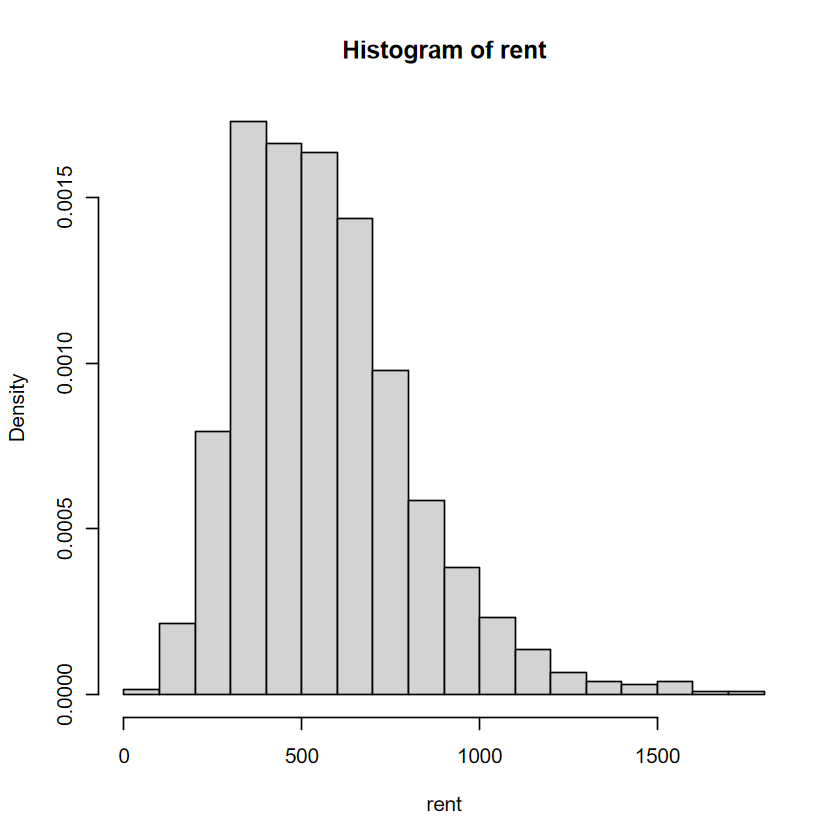

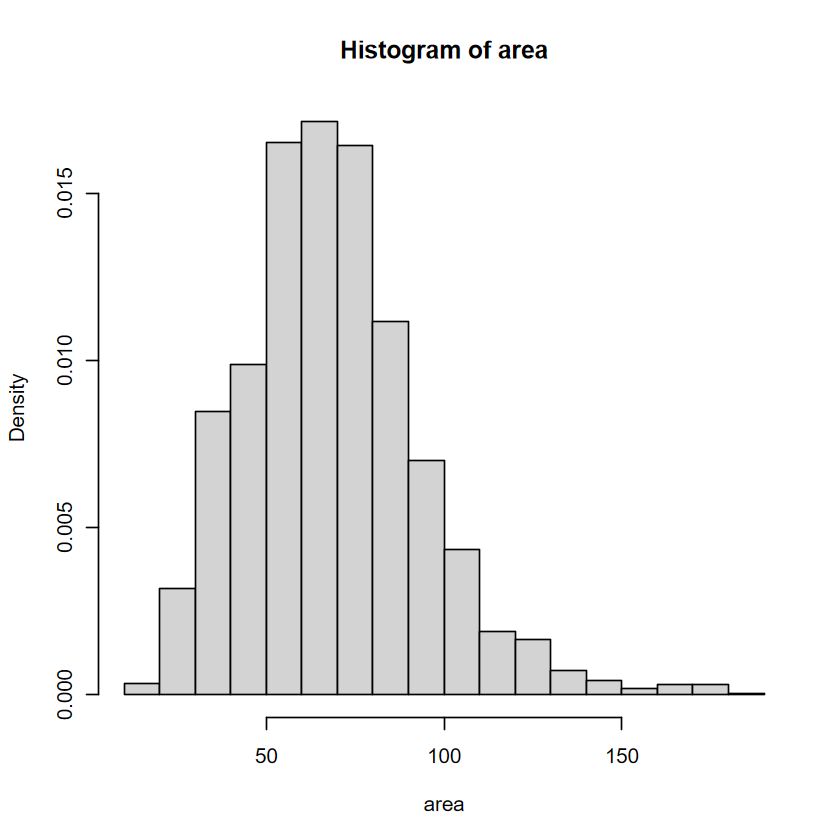

In [4]:
hist(rent,freq=F)
hist(area,freq=F)

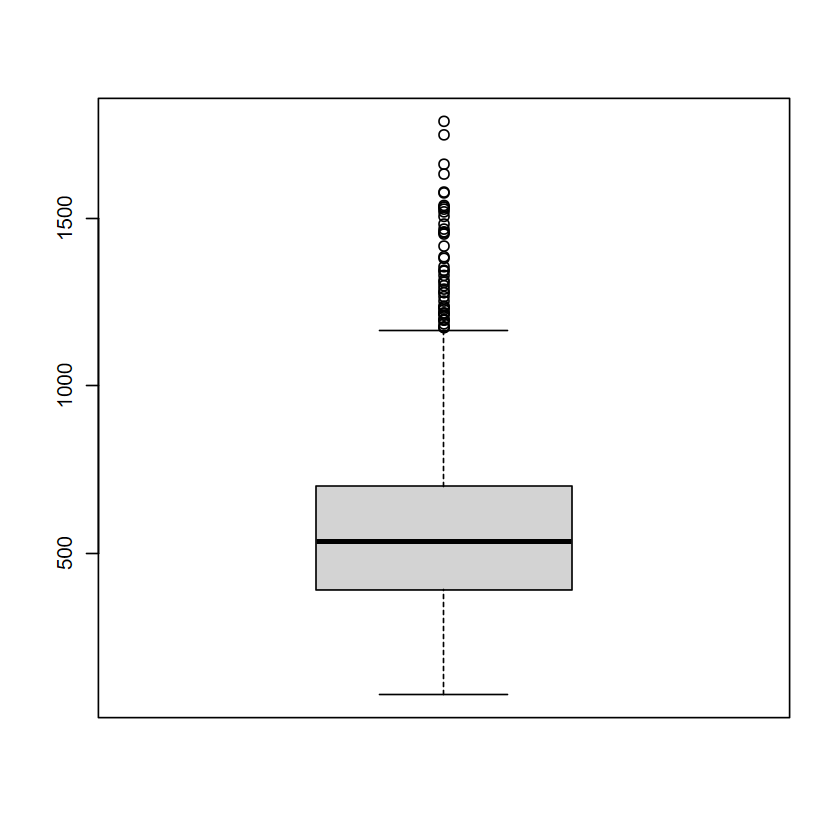

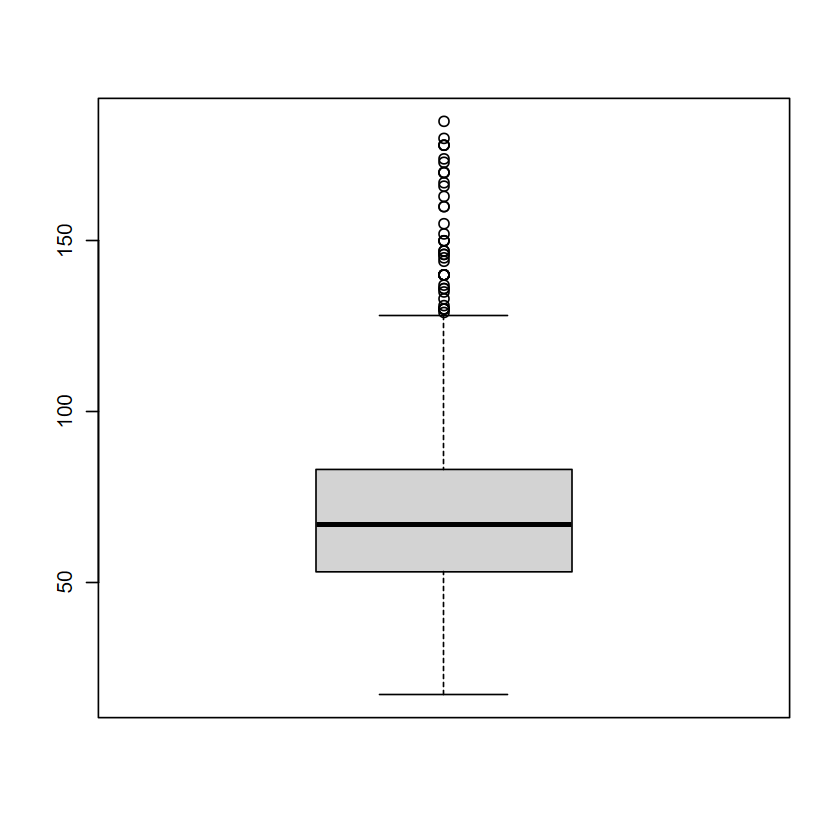

In [5]:
boxplot(rent)
boxplot(area)

In [6]:
df_num <- df[ , c("rent", "area")]

outlier_ratio <- function(x) {
  x <- x[!is.na(x)]  
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR
  upper <- Q3 + 1.5 * IQR
  outliers <- sum(x < lower | x > upper)
  ratio <- outliers / length(x)
  return(ratio)
}

ratios <- sapply(df_num, outlier_ratio)
outlier_summary <- data.frame(
  Variable = names(ratios),
  Outlier_Ratio = round(ratios, 4)*100
)
print(outlier_summary)

     Variable Outlier_Ratio
rent     rent          2.29
area     area          2.24


In [7]:
replace_outliers_with_bounds <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR
  upper <- Q3 + 1.5 * IQR
  
  x[x < lower] <- lower
  x[x > upper] <- upper
  return(x)
}

In [8]:
df$rent <- replace_outliers_with_bounds(df$rent)
df$area <- replace_outliers_with_bounds(df$area)

In [9]:
df_num <- df[ , c("rent", "area")]
ratios <- sapply(df_num, outlier_ratio)
outlier_summary <- data.frame(
  Variable = names(ratios),
  Outlier_Ratio = round(ratios, 4)*100
)
print(outlier_summary)

     Variable Outlier_Ratio
rent     rent             0
area     area             0


In [10]:
library(readr)
write_csv(df, "Munich03_cleaned.csv")

For the visualization purpose afterward, I added full name of the districts to the data

In [11]:
library(dplyr)
df <- df %>%
  mutate(district_full = recode(district,
    "Alt-Le"     = "Altstadt-Lehel",
    "Lud-Isar"   = "Ludwigsvorstadt-Isarvorstadt",
    "Maxvor"     = "Maxvorstadt",
    "SchwWest"   = "Schwabing-West",
    "Au-Haid"    = "Au-Haidhausen",
    "Send"       = "Sendling",
    "Send-West"  = "Sendling-Westpark",
    "Schwanth"   = "Schwanthalerhöhe",
    "Neuh-Nymp"  = "Neuhausen-Nymphenburg",
    "Moos"       = "Moosach",
    "Mil-AmH"    = "Milbertshofen-Am Hart",
    "Schwab-Frei"= "Schwabing-Freimann",
    "Bogenh"     = "Bogenhausen",
    "BamLaim"    = "Berg am Laim",
    "Trud-Riem"  = "Trudering-Riem",
    "Ram-Per"    = "Ramersdorf-Perlach",
    "Obgies"     = "Obergiesing",
    "Ugies-Har"  = "Untergiesing-Harlaching",
    "Th-Ob-Fo-Fu-So" = "Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln",
    "Had"        = "Hadern",
    "Pas-Obmenz" = "Pasing-Obermenzing",
    "Au-Lo-La"   = "Aubing-Lochhausen-Langwied",
    "All-Umenz"  = "Allach-Untermenzing",
    "Feld-Has"   = "Feldmoching-Hasenbergl",
    "Laim"       = "Laim"
  ))

In [12]:
library(readr)
write_csv(df, "Munich03_cleaned_viz.csv")